In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm


from scipy.stats import spearmanr
from scipy import stats

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler

from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
#importer le jeu de données du 2005 à 2020. Et 2021
#Yacine :
df = pd.read_csv("/content/drive/MyDrive/Streamlit_WHR/Fichier_de_base.csv")
df_21 =pd.read_csv("/content/drive/MyDrive/Streamlit_WHR/Fichier_2021.csv")

## EDA

In [ ]:
df.head(20)

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268
5,Afghanistan,2013,3.572,7.725,0.484,52.56,0.578,0.061,0.823,0.621,0.273
6,Afghanistan,2014,3.131,7.718,0.526,52.88,0.509,0.104,0.871,0.532,0.375
7,Afghanistan,2015,3.983,7.702,0.529,53.20,0.389,0.080,0.881,0.554,0.339
8,Afghanistan,2016,4.220,7.697,0.559,53.00,0.523,0.042,0.793,0.565,0.348
9,Afghanistan,2017,2.662,7.697,0.491,52.80,0.427,-0.121,0.954,0.496,0.371


In [ ]:
df_21.head()

,Country name,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [ ]:
# Group by the 'year' column and count the number of entries for each year
year_counts = df.groupby('year').size()

# Print the number of rows per year
print(year_counts)

year
2005     27
2006     89
2007    102
2008    110
2009    114
2010    124
2011    146
2012    142
2013    137
2014    145
2015    143
2016    142
2017    147
2018    142
2019    144
2020     95
dtype: int64


In [ ]:
df.info()#affichage des informations sur nos variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1949 entries, 0 to 1948
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      1949 non-null   object 
 1   year                              1949 non-null   int64  
 2   Life Ladder                       1949 non-null   float64
 3   Log GDP per capita                1913 non-null   float64
 4   Social support                    1936 non-null   float64
 5   Healthy life expectancy at birth  1894 non-null   float64
 6   Freedom to make life choices      1917 non-null   float64
 7   Generosity                        1860 non-null   float64
 8   Perceptions of corruption         1839 non-null   float64
 9   Positive affect                   1927 non-null   float64
 10  Negative affect                   1933 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 167.6+ KB


In [ ]:
df.describe() # Résumé statistique des variables numériques

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,1949.000000,1949.000000,1913.000000,1936.000000,1894.000000,1917.000000,1860.000000,1839.000000,1927.000000,1933.000000
mean,2013.216008,5.466705,9.368453,0.812552,63.359374,0.742558,0.000103,0.747125,0.710003,0.268544
std,4.166828,1.115711,1.154084,0.118482,7.510245,0.142093,0.162215,0.186789,0.107100,0.085168
min,2005.000000,2.375000,6.635000,0.290000,32.300000,0.258000,-0.335000,0.035000,0.322000,0.083000
25%,2010.000000,4.640000,8.464000,0.749750,58.685000,0.647000,-0.113000,0.690000,0.625500,0.206000
50%,2013.000000,5.386000,9.460000,0.835500,65.200000,0.763000,-0.025500,0.802000,0.722000,0.258000
75%,2017.000000,6.283000,10.353000,0.905000,68.590000,0.856000,0.091000,0.872000,0.799000,0.320000
max,2020.000000,8.019000,11.648000,0.987000,77.100000,0.985000,0.698000,0.983000,0.944000,0.705000


In [ ]:
df.isna().sum() #affichage des valeurs manquantes pour chaque variable

,0
Country name,0
year,0
Life Ladder,0
Log GDP per capita,36
Social support,13
Healthy life expectancy at birth,55
Freedom to make life choices,32
Generosity,89
Perceptions of corruption,110
Positive affect,22


Diagnostic des variables qui contiennent des valeurs manquantes

In [ ]:

# Filtrer les lignes où la variable Log GDP per capita est nulle
null_values = df[df['Log GDP per capita'].isnull()]

# Afficher les valeurs nulles
print(null_values[['Country name', "year"  ]])

                   Country name  year
423                        Cuba  2006
436                      Cyprus  2020
709   Hong Kong S.A.R. of China  2020
771                        Iran  2018
772                        Iran  2019
773                        Iran  2020
918                      Kosovo  2020
1087                      Malta  2020
1280               North Cyprus  2012
1281               North Cyprus  2013
1282               North Cyprus  2014
1283               North Cyprus  2015
1284               North Cyprus  2016
1285               North Cyprus  2018
1286               North Cyprus  2019
1337    Palestinian Territories  2018
1338    Palestinian Territories  2019
1559                    Somalia  2014
1560                    Somalia  2015
1561                    Somalia  2016
1562          Somaliland region  2009
1563          Somaliland region  2010
1564          Somaliland region  2011
1565          Somaliland region  2012
1596                South Sudan  2014
1597        

In [ ]:

# Filtrer les lignes où la variable Social support
null_values = df[df["Social support"].isnull()]

# Afficher les valeurs nulles
print(null_values[["Country name", "year", "Life Ladder", "Social support"]])

              Country name  year  Life Ladder  Social support
25                 Algeria  2010        5.464             NaN
112                Bahrain  2014        6.165             NaN
294                 Canada  2007        7.482             NaN
466               Djibouti  2010        5.006             NaN
925                 Kuwait  2014        6.180             NaN
1164               Morocco  2010        4.383             NaN
1310                  Oman  2011        6.853             NaN
1423                 Qatar  2010        6.850             NaN
1426                 Qatar  2015        6.375             NaN
1741               Tunisia  2009        5.025             NaN
1814  United Arab Emirates  2014        6.540             NaN
1837         United States  2007        7.513             NaN
1905               Vietnam  2017        5.175             NaN


In [ ]:

# Filtrer les lignes où la variable Healthy life expectancy at birth
null_values = df[df["Healthy life expectancy at birth"].isnull()]

# Afficher les valeurs nulles
print(null_values[["Country name", "year", "Healthy life expectancy at birth"]])

                   Country name  year  Healthy life expectancy at birth
699   Hong Kong S.A.R. of China  2006                               NaN
700   Hong Kong S.A.R. of China  2008                               NaN
701   Hong Kong S.A.R. of China  2009                               NaN
702   Hong Kong S.A.R. of China  2010                               NaN
703   Hong Kong S.A.R. of China  2011                               NaN
704   Hong Kong S.A.R. of China  2012                               NaN
705   Hong Kong S.A.R. of China  2014                               NaN
706   Hong Kong S.A.R. of China  2016                               NaN
707   Hong Kong S.A.R. of China  2017                               NaN
708   Hong Kong S.A.R. of China  2019                               NaN
709   Hong Kong S.A.R. of China  2020                               NaN
905                      Kosovo  2007                               NaN
906                      Kosovo  2008                           

In [ ]:

# Filtrer les lignes où la variable Freedom to make life choices
null_values = df[df["Freedom to make life choices"].isnull()]

# Afficher les valeurs nulles
print(null_values[["Country name", "year", "Freedom to make life choices"]])

              Country name  year  Freedom to make life choices
28                 Algeria  2014                           NaN
29                 Algeria  2016                           NaN
112                Bahrain  2014                           NaN
263               Cambodia  2006                           NaN
342                  China  2006                           NaN
343                  China  2007                           NaN
350                  China  2014                           NaN
351                  China  2015                           NaN
352                  China  2016                           NaN
500                  Egypt  2008                           NaN
779                   Iraq  2013                           NaN
860                 Jordan  2005                           NaN
862                 Jordan  2008                           NaN
906                 Kosovo  2008                           NaN
925                 Kuwait  2014                       

In [ ]:
# Filtrer les lignes où la variable Generosity
null_values = df[df["Generosity"].isnull()]

# Afficher les valeurs nulles
print(null_values[["Country name", "year", "Generosity"]])

     Country name  year  Generosity
28        Algeria  2014         NaN
29        Algeria  2016         NaN
66      Australia  2005         NaN
110       Bahrain  2012         NaN
111       Bahrain  2013         NaN
...           ...   ...         ...
1892    Venezuela  2019         NaN
1893    Venezuela  2020         NaN
1905      Vietnam  2017         NaN
1918        Yemen  2018         NaN
1919        Yemen  2019         NaN

[89 rows x 3 columns]


In [ ]:
# Filtrer les lignes où la variable Perceptions of corruption
null_values = df[df["Perceptions of corruption"].isnull()]

# Afficher les valeurs nulles
print(null_values[["Country name", "year", "Perceptions of corruption"]])

     Country name  year  Perceptions of corruption
28        Algeria  2014                        NaN
29        Algeria  2016                        NaN
112       Bahrain  2014                        NaN
113       Bahrain  2015                        NaN
114       Bahrain  2016                        NaN
...           ...   ...                        ...
1903      Vietnam  2015                        NaN
1905      Vietnam  2017                        NaN
1908        Yemen  2007                        NaN
1916        Yemen  2016                        NaN
1917        Yemen  2017                        NaN

[110 rows x 3 columns]


In [ ]:
# Filtrer les lignes où la variable Positive affect
null_values = df[df["Positive affect"].isnull()]

# Afficher les valeurs nulles
print(null_values[["Country name", "year", "Positive affect"]])

              Country name  year  Positive affect
25                 Algeria  2010              NaN
112                Bahrain  2014              NaN
126             Bangladesh  2014              NaN
135                Belarus  2008              NaN
264               Cambodia  2007              NaN
466               Djibouti  2010              NaN
779                   Iraq  2013              NaN
872                 Jordan  2018              NaN
873                 Jordan  2019              NaN
874                 Jordan  2020              NaN
906                 Kosovo  2008              NaN
925                 Kuwait  2014              NaN
1062              Maldives  2018              NaN
1164               Morocco  2010              NaN
1310                  Oman  2011              NaN
1311              Pakistan  2005              NaN
1423                 Qatar  2010              NaN
1426                 Qatar  2015              NaN
1741               Tunisia  2009              NaN


In [ ]:
# Filtrer les lignes où la variable Negative affect
null_values = df[df["Negative affect"].isnull()]

# Afficher les valeurs nulles
print(null_values[["Country name", "year", "Negative affect"]])

              Country name  year  Negative affect
25                 Algeria  2010              NaN
112                Bahrain  2014              NaN
466               Djibouti  2010              NaN
872                 Jordan  2018              NaN
873                 Jordan  2019              NaN
874                 Jordan  2020              NaN
925                 Kuwait  2014              NaN
1062              Maldives  2018              NaN
1164               Morocco  2010              NaN
1380           Philippines  2006              NaN
1423                 Qatar  2010              NaN
1426                 Qatar  2015              NaN
1741               Tunisia  2009              NaN
1753                Turkey  2005              NaN
1814  United Arab Emirates  2014              NaN
1905               Vietnam  2017              NaN


*texte en italique*

#### Récupération de la classification des pays par région du dataset 2021.

In [ ]:
# Définir l'option pour afficher toutes les lignes
pd.set_option("display.max_rows", None)

# Afficher les colonnes "Country name" et "Regional indicator"
print(df_21[["Country name", "Regional indicator"]])

                  Country name                  Regional indicator
0                      Finland                      Western Europe
1                      Denmark                      Western Europe
2                  Switzerland                      Western Europe
3                      Iceland                      Western Europe
4                  Netherlands                      Western Europe
5                       Norway                      Western Europe
6                       Sweden                      Western Europe
7                   Luxembourg                      Western Europe
8                  New Zealand               North America and ANZ
9                      Austria                      Western Europe
10                   Australia               North America and ANZ
11                      Israel        Middle East and North Africa
12                     Germany                      Western Europe
13                      Canada               North America and

Adjonction de la variable région pour notre dataset

In [ ]:
def get_regional_indicator(country_name):
    # Dictionnaire de correspondance des pays avec leur région
    country_to_region = {
        "Denmark": "Western Europe",
        "France": "Western Europe",
        "Mexico": "Latin America and Caribbean",
        "Germany": "Western Europe",
        "Poland": "Central and Eastern Europe",
        "Spain": "Western Europe",
        "Greece": "Western Europe",
        "Brazil": "Latin America and Caribbean",
        "Sweden": "Western Europe",
        "Egypt": "Middle East and North Africa",
        "Saudi Arabia": "Middle East and North Africa",
        "Lebanon": "Middle East and North Africa",
        "Netherlands": "Western Europe",
        "Australia": "Australia and New Zealand",
        "United Kingdom": "Western Europe",
        "Canada": "North America",
        "Iran": "Middle East and North Africa",
        "Pakistan": "South Asia",
        "Hungary": "Central and Eastern Europe",
        "Czech Republic": "Central and Eastern Europe",
        "Belgium": "Western Europe",
        "Turkey": "Middle East and North Africa",
        "Jordan": "Middle East and North Africa",
        "Venezuela": "Latin America and Caribbean",
        "Italy": "Western Europe",
        "Japan": "East Asia",
        "Romania": "Central and Eastern Europe",
        "Portugal": "Western Europe",
        "Singapore": "Southeast Asia",
        "Sierra Leone": "Sub-Saharan Africa",
        "Rwanda": "Sub-Saharan Africa",
        "Chile": "Latin America and Caribbean",
        "Senegal": "Sub-Saharan Africa",
        "Russia": "Commonwealth of Independent States",
        "Colombia": "Latin America and Caribbean",
        "Chad": "Sub-Saharan Africa",
        "China": "East Asia",
        "South Korea": "East Asia",
        "Slovenia": "Central and Eastern Europe",
        "Uganda": "Sub-Saharan Africa",
        "Belarus": "Commonwealth of Independent States",
        "Trinidad and Tobago": "Latin America and Caribbean",
        "Togo": "Sub-Saharan Africa",
        "Benin": "Sub-Saharan Africa",
        "Thailand": "Southeast Asia",
        "Tanzania": "Sub-Saharan Africa",
        "Bolivia": "Latin America and Caribbean",
        "Tajikistan": "Commonwealth of Independent States",
        "Taiwan Province of China": "East Asia",
        "Switzerland": "Western Europe",
        "Botswana": "Sub-Saharan Africa",
        "Sri Lanka": "South Asia",
        "Burkina Faso": "Sub-Saharan Africa",
        "Cambodia": "Southeast Asia",
        "South Africa": "Sub-Saharan Africa",
        "Cameroon": "Sub-Saharan Africa",
        "Slovakia": "Central and Eastern Europe",
        "Philippines": "Southeast Asia",
        "Costa Rica": "Latin America and Caribbean",
        "Cuba": "Latin America and Caribbean",
        "Malawi": "Sub-Saharan Africa",
        "Madagascar": "Sub-Saharan Africa",
        "Guatemala": "Latin America and Caribbean",
        "Lithuania": "Central and Eastern Europe",
        "Haiti": "Latin America and Caribbean",
        "Latvia": "Central and Eastern Europe",
        "Honduras": "Latin America and Caribbean",
        "Malaysia": "Southeast Asia",
        "Laos": "Southeast Asia",
        "Kyrgyzstan": "Commonwealth of Independent States",
        "Kuwait": "Middle East and North Africa",
        "Kenya": "Sub-Saharan Africa",
        "India": "South Asia",
        "Kazakhstan": "Commonwealth of Independent States",
        "Indonesia": "Southeast Asia",
        "Jamaica": "Latin America and Caribbean",
        "Ireland": "Western Europe",
        "Hong Kong S.A.R. of China": "East Asia",
        "Ghana": "Sub-Saharan Africa",
        "Mali": "Sub-Saharan Africa",
        "Georgia": "Commonwealth of Independent States",
        "Cyprus": "Middle East and North Africa",
        "Paraguay": "Latin America and Caribbean",
        "Panama": "Latin America and Caribbean",
        "Palestinian Territories": "Middle East and North Africa",
        "Bangladesh": "South Asia",
        "Dominican Republic": "Latin America and Caribbean",
        "Norway": "Western Europe",
        "Ecuador": "Latin America and Caribbean",
        "Nigeria": "Sub-Saharan Africa",
        "Niger": "Sub-Saharan Africa",
        "Nicaragua": "Latin America and Caribbean",
        "El Salvador": "Latin America and Caribbean",
        "New Zealand": "Australia and New Zealand",
        "Estonia": "Central and Eastern Europe",
        "Nepal": "South Asia",
        "Mozambique": "Sub-Saharan Africa",
        "Finland": "Western Europe",
        "Moldova": "Commonwealth of Independent States",
        "Peru": "Latin America and Caribbean",
        "Ukraine": "Commonwealth of Independent States",
        "Israel": "Middle East and North Africa",
        "Azerbaijan": "Commonwealth of Independent States",
        "Vietnam": "Southeast Asia",
        "Uruguay": "Latin America and Caribbean",
        "Zimbabwe": "Sub-Saharan Africa",
        "Armenia": "Commonwealth of Independent States",
        "Austria": "Western Europe",
        "Argentina": "Latin America and Caribbean",
        "United States": "North America",
        "Zambia": "Sub-Saharan Africa",
        "United Arab Emirates": "Middle East and North Africa",
        "Uzbekistan": "Commonwealth of Independent States",
        "Liberia": "Sub-Saharan Africa",
        "Bosnia and Herzegovina": "Central and Eastern Europe",
        "Montenegro": "Central and Eastern Europe",
        "Croatia": "Central and Eastern Europe",
        "Central African Republic": "Sub-Saharan Africa",
        "Mongolia": "East Asia",
        "Bulgaria": "Central and Eastern Europe",
        "Albania": "Central and Eastern Europe",
        "Mauritania": "Sub-Saharan Africa",
        "Yemen": "Middle East and North Africa",
        "Kosovo": "Central and Eastern Europe",
        "Serbia": "Central and Eastern Europe",
        "North Macedonia": "Central and Eastern Europe",
        "Belize": "Latin America and Caribbean",
        "Guyana": "Latin America and Caribbean",
        "Namibia": "Sub-Saharan Africa",
        "Afghanistan": "South Asia",
        "Djibouti": "Sub-Saharan Africa",
        "Congo (Brazzaville)": "Sub-Saharan Africa",
        "Iceland": "Western Europe",
        "Iraq": "Middle East and North Africa",
        "Syria": "Middle East and North Africa",
        "Burundi": "Sub-Saharan Africa",
        "Congo (Kinshasa)": "Sub-Saharan Africa",
        "Qatar": "Middle East and North Africa",
        "Ivory Coast": "Sub-Saharan Africa",
        "Tunisia": "Middle East and North Africa",
        "Turkmenistan": "Commonwealth of Independent States",
        "Comoros": "Sub-Saharan Africa",
        "Bahrain": "Middle East and North Africa",
        "Somaliland region": "Sub-Saharan Africa",
        "Luxembourg": "Western Europe",
        "Malta": "Western Europe",
        "Sudan": "Sub-Saharan Africa",
        "Algeria": "Middle East and North Africa",
        "Morocco": "Middle East and North Africa",
        "Swaziland": "Sub-Saharan Africa",
        "Guinea": "Sub-Saharan Africa",
        "Lesotho": "Sub-Saharan Africa",
        "Oman": "Middle East and North Africa",
        "Angola": "Sub-Saharan Africa",
        "Gabon": "Sub-Saharan Africa",
        "Mauritius": "Sub-Saharan Africa",
        "Myanmar": "Southeast Asia",
        "North Cyprus": "Western Europe",
        "Suriname": "Latin America and Caribbean",
        "Libya": "Middle East and North Africa",
        "Ethiopia": "Sub-Saharan Africa",
        "Bhutan": "South Asia",
        "Somalia": "Sub-Saharan Africa",
        "South Sudan": "Sub-Saharan Africa",
        "Gambia": "Sub-Saharan Africa",
        "Maldives": "South Asia"
    }

    # Recherche le pays dans le dictionnaire
    if country_name in country_to_region:
        return country_to_region[country_name]
    else:
        return "Unknown"

# Ajouter une colonne "Regional indicator" dans le DataFrame
df["Regional indicator"] = df["Country name"].apply(get_regional_indicator)


In [ ]:
print("Les valeurs manquantes pour la variable 'Regional indicator' =  ", df["Regional indicator"].isna().sum())

Les valeurs manquantes pour la variable 'Regional indicator' =   0


Adjonction la variable température

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Streamlit_WHR/climate_change_indicators.csv', sep=";")

df_a_renamed = df2.rename(columns={'NMGB': 'Country name', 'Year': 'year'})
df = pd.merge(df, df_a_renamed[['Country name', 'year', 'Temperature']], on=['Country name', 'year'], how='left')
df.head()

,Country name,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Regional indicator,Temperature
0,Afghanistan,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,South Asia,0.704
1,Afghanistan,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,South Asia,0.895
2,Afghanistan,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,South Asia,1.613
3,Afghanistan,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,South Asia,1.397
4,Afghanistan,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,South Asia,0.223


In [ ]:
print ("Les valeur manquantes pour la variable 'Temperature'  =", df["Temperature"].isna().sum())

Les valeur manquantes pour la variable 'Temperature'  = 110


In [ ]:
null_valuesT = df[df["Temperature"].isnull()]
pd.set_option('display.max_rows', None)

# Afficher les valeurs nulles
print(null_valuesT[["Country name", "year", "Temperature"]])

                 Country name  year  Temperature
258                   Burundi  2008          NaN
259                   Burundi  2009          NaN
260                   Burundi  2011          NaN
261                   Burundi  2014          NaN
262                   Burundi  2018          NaN
342                     China  2006          NaN
343                     China  2007          NaN
402                Costa Rica  2012          NaN
403                Costa Rica  2013          NaN
404                Costa Rica  2014          NaN
405                Costa Rica  2015          NaN
406                Costa Rica  2016          NaN
407                Costa Rica  2017          NaN
408                Costa Rica  2018          NaN
409                Costa Rica  2019          NaN
410                   Croatia  2007          NaN
437            Czech Republic  2005          NaN
438            Czech Republic  2007          NaN
468        Dominican Republic  2006          NaN
469        Dominican

Pourcentage des valeurs manquantes par variables

In [ ]:
ratio_val_manquantes = df.isnull().sum()/len (df)*100
ratio_val_manquantes_arrondies = round(ratio_val_manquantes, 2)
print(ratio_val_manquantes_arrondies)

Country name                        0.00
year                                0.00
Life Ladder                         0.00
Log GDP per capita                  1.85
Social support                      0.67
Healthy life expectancy at birth    2.82
Freedom to make life choices        1.64
Generosity                          4.57
Perceptions of corruption           5.64
Positive affect                     1.13
Negative affect                     0.82
Regional indicator                  0.00
Temperature                         5.64
dtype: float64


## traitement des valeurs manquantes

In [ ]:

#Scrapping de la variable "Log GDP per capita"
import requests
import math
# Mapping des noms de pays à leurs codes ISO utilisés par l'API de la Banque mondiale
country_codes = {
    'Cuba': 'CUB',
    'Somaliland region': 'SOM',  # Note: Somaliland n'a peut-être pas de code ISO officiel
    'North Cyprus': 'CYP',  # Note: North Cyprus n'a pas de code ISO officiel
    'Somalia': 'SOM',
    'South Sudan': 'SSD',
    'Yemen': 'YEM',
    'Taiwan Province of China': 'TWN',  # Note: Utilisez TWN pour Taiwan
    'Venezuela': 'VEN',
    'Palestinian Territories': 'PSE',
    'Iran': 'IRN',
    'Hong Kong S.A.R. of China': 'HKG',
    'Kosovo': 'XKX',  # Note: Kosovo utilise XKX comme code ISO
    'Cyprus': 'CYP',
    'Malta': 'MLT'
}

# Fonction pour récupérer le PIB par habitant et calculer son logarithme
def get_log_gdp(country_name, year):
    if country_name not in country_codes:
        return None

    country_code = country_codes[country_name]
    url = f'http://api.worldbank.org/v2/country/{country_code}/indicator/NY.GDP.PCAP.CD?date={year}&format=json'
    response = requests.get(url)
    if response.status_code == 200:
        data = response.json()
        if data and len(data) > 1 and data[1]:
            gdp_value = data[1][0].get('value', None)
            if gdp_value:
                return math.log(gdp_value)
    return None

# Liste pour stocker les résultats
log_gdp_results = []

# Compléter les données manquantes et stocker les résultats dans la liste
for index, row in df.iterrows():
    if pd.isna(row['Log GDP per capita']):
        country = row['Country name']
        year = row['year']
        log_gdp = get_log_gdp(country, year)
        log_gdp_results.append(log_gdp)
        if log_gdp is not None:
            df.at[index, 'Log GDP per capita'] = log_gdp
    else:
        log_gdp_results.append(row['Log GDP per capita'])

# Mettre à jour le DataFrame avec les résultats de la liste
df['Log GDP per capita'] = log_gdp_results

# Afficher le DataFrame mis à jour
df.isna().sum()


,0
Country name,0
year,0
Life Ladder,0
Log GDP per capita,36
Social support,13
Healthy life expectancy at birth,55
Freedom to make life choices,32
Generosity,89
Perceptions of corruption,110
Positive affect,22


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.impute import KNNImputer

# Trier les données par pays et par année
df = df.sort_values(by=['Country name', 'year'])

# Fonction pour l'imputation par régression linéaire
def linear_regression_imputation(df, column):
    for name, group in df.groupby('Country name'):
        if group[column].isnull().any():
            X_train = group.loc[group[column].notna(), 'year'].values.reshape(-1, 1)
            y_train = group.loc[group[column].notna(), column].values
            X_missing = group.loc[group[column].isna(), 'year'].values.reshape(-1, 1)

            if len(X_train) > 1:
                model = LinearRegression()
                model.fit(X_train, y_train)
                predicted_values = model.predict(X_missing)
                df.loc[group.index[group[column].isna()], column] = predicted_values

# Appliquer l'imputation par régression linéaire pour chaque variable
variables = ['Log GDP per capita', 'Generosity', 'Social support',
             'Healthy life expectancy at birth', 'Freedom to make life choices',
             'Perceptions of corruption', 'Positive affect', 'Negative affect', 'Temperature']
for var in variables:
    linear_regression_imputation(df, var)

# Appliquer l'imputation par KNN pour les valeurs manquantes restantes
imputer = KNNImputer(n_neighbors=5)
df[variables] = imputer.fit_transform(df[variables])

# Vérifier les valeurs manquantes restantes
print("Valeurs manquantes après imputation par KNN:")
df.isna().sum()


Valeurs manquantes après imputation par KNN:


,0
Country name,0
year,0
Life Ladder,0
Log GDP per capita,0
Social support,0
Healthy life expectancy at birth,0
Freedom to make life choices,0
Generosity,0
Perceptions of corruption,0
Positive affect,0


## Encodage des variables "Country name" et Regional indicator".

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Instancier et appliquer l'encodage one-hot pour la variable "Country name"
onehot_encoder_country = OneHotEncoder(sparse=False)
country_encoded = onehot_encoder_country.fit_transform(df[['Country name']])
country_columns = [f'Country_{name}' for name in onehot_encoder_country.categories_[0]]

# Créer un dataframe à partir des résultats de l'encodage one-hot pour les pays
country_encoded_df = pd.DataFrame(country_encoded, columns=country_columns)

# Instancier et appliquer l'encodage one-hot pour la variable "Regional indicator"
onehot_encoder_region = OneHotEncoder(sparse=False)
region_encoded = onehot_encoder_region.fit_transform(df[['Regional indicator']])
region_columns = [f'Region_{name}' for name in onehot_encoder_region.categories_[0]]

# Créer un dataframe à partir des résultats de l'encodage one-hot pour les régions
region_encoded_df = pd.DataFrame(region_encoded, columns=region_columns)

# Concaténer les dataframes encodés avec le dataframe original
df = pd.concat([df, country_encoded_df, region_encoded_df], axis=1)

# Supprimer les colonnes originales des variables catégorielles
df.drop(['Country name', 'Regional indicator'], axis=1, inplace=True)


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
df.head()

,year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,...,Region_Central and Eastern Europe,Region_Commonwealth of Independent States,Region_East Asia,Region_Latin America and Caribbean,Region_Middle East and North Africa,Region_North America,Region_South Asia,Region_Southeast Asia,Region_Sub-Saharan Africa,Region_Western Europe
0,2008,3.724,7.370,0.451,50.80,0.718,0.168,0.882,0.518,0.258,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,2009,4.402,7.540,0.552,51.20,0.679,0.190,0.850,0.584,0.237,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2010,4.758,7.647,0.539,51.60,0.600,0.121,0.707,0.618,0.275,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,2011,3.832,7.620,0.521,51.92,0.496,0.162,0.731,0.611,0.267,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,2012,3.783,7.705,0.521,52.24,0.531,0.236,0.776,0.710,0.268,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


### Standardisation

In [ ]:
from sklearn.preprocessing import StandardScaler

# Instancier le standardiseur
scaler = StandardScaler()

# Sélectionner uniquement les colonnes numériques à standardiser
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

# Appliquer la standardisation
df[num_cols] = scaler.fit_transform(df[num_cols])


## Modélisation

In [ ]:
from sklearn.model_selection import train_test_split

# Définir les features et la target
X = df.drop('Life Ladder', axis=1)  # Toutes les colonnes sauf 'Life Ladder'
y = df['Life Ladder']               # La colonne 'Life Ladder'

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Afficher les dimensions des ensembles pour vérifier
print("Taille de l'ensemble d'entraînement :", X_train.shape, y_train.shape)
print("Taille de l'ensemble de test :", X_test.shape, y_test.shape)


Taille de l'ensemble d'entraînement : (1559, 187) (1559,)
Taille de l'ensemble de test : (390, 187) (390,)


## Model de regression linière

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Créer l'instance du modèle
model = LinearRegression()

# Entraîner le modèle sur l'ensemble d'entraînement
model.fit(X_train, y_train)

# Prédictions sur l'ensemble d'entraînement
y_train_pred = model.predict(X_train)

# Prédictions sur l'ensemble de test
y_test_pred = model.predict(X_test)

# Calcul des performances
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"Ensemble d'entraînement: MSE = {mse_train:.2f}, R² = {r2_train:.2f}")
print(f"Ensemble de test: MSE = {mse_test:.2f}, R² = {r2_test:.2f}")


Ensemble d'entraînement: MSE = 0.09, R² = 0.91
Ensemble de test: MSE = 8697244222796863115362304.00, R² = -8545130609039077900550144.00


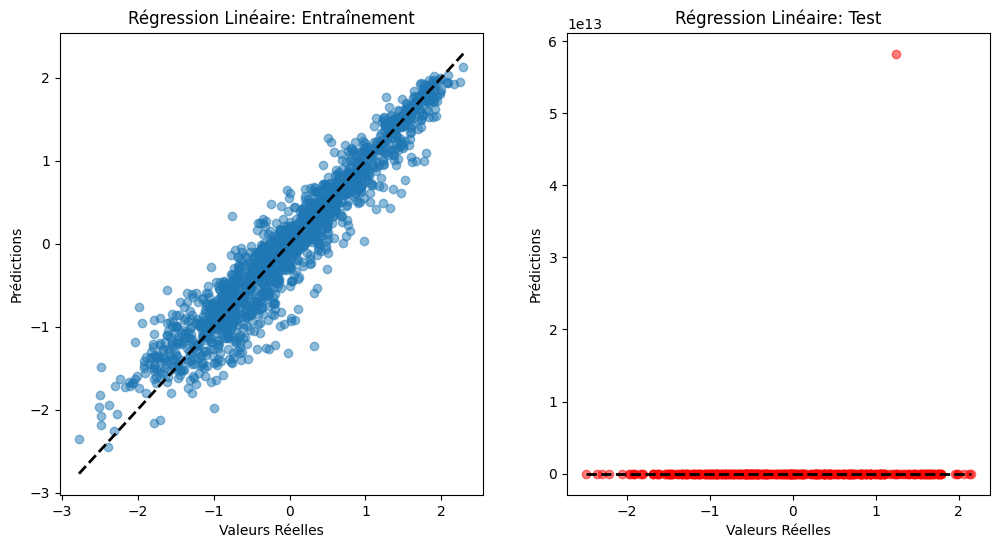

In [ ]:

# Graphique des prédictions vs valeurs réelles pour l'entraînement
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, 1er subplot
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.title('Régression Linéaire: Entraînement')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')

# Graphique des prédictions vs valeurs réelles pour le test
plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, 2e subplot
plt.scatter(y_test, y_test_pred, alpha=0.5, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Régression Linéaire: Test')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')

plt.show()


## Model de regression Ridge

In [ ]:
from sklearn.linear_model import Ridge

# Création du modèle Ridge
# alpha est le paramètre de régularisation (plus il est élevé, plus la régularisation est forte)
ridge_model = Ridge(alpha=1.0)

# Entraînement du modèle sur l'ensemble d'entraînement
ridge_model.fit(X_train, y_train)

# Prédictions sur l'ensemble d'entraînement
y_train_pred_ridge = ridge_model.predict(X_train)

# Prédictions sur l'ensemble de test
y_test_pred_ridge = ridge_model.predict(X_test)

# Calcul des performances
mse_train_ridge = mean_squared_error(y_train, y_train_pred_ridge)
r2_train_ridge = r2_score(y_train, y_train_pred_ridge)
mse_test_ridge = mean_squared_error(y_test, y_test_pred_ridge)
r2_test_ridge = r2_score(y_test, y_test_pred_ridge)

print(f"Ridge - Ensemble d'entraînement: MSE = {mse_train_ridge:.2f}, R² = {r2_train_ridge:.2f}")
print(f"Ridge - Ensemble de test: MSE = {mse_test_ridge:.2f}, R² = {r2_test_ridge:.2f}")


Ridge - Ensemble d'entraînement: MSE = 0.09, R² = 0.91
Ridge - Ensemble de test: MSE = 0.12, R² = 0.88


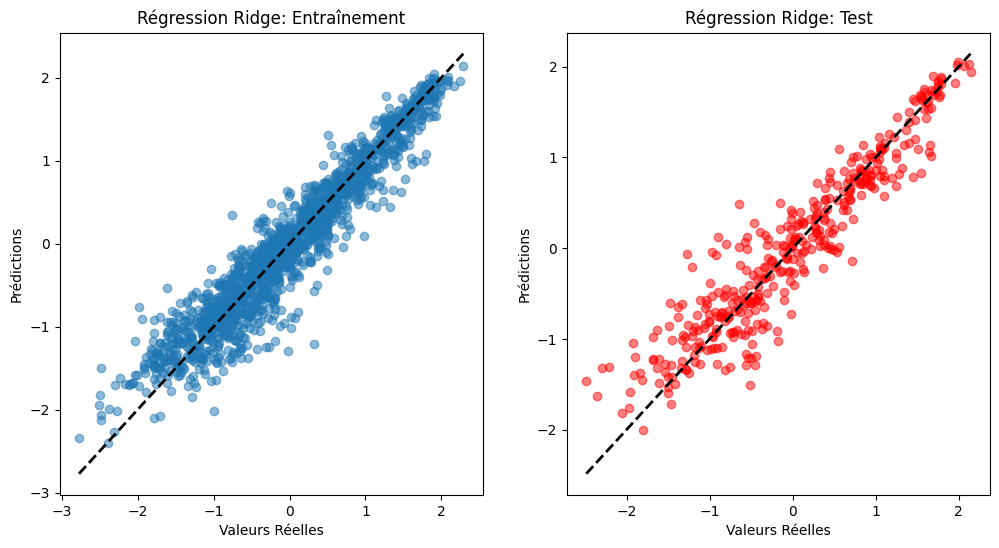

In [ ]:
# Graphique des prédictions vs valeurs réelles pour l'entraînement avec Ridge
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, 1er subplot
plt.scatter(y_train, y_train_pred_ridge, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.title('Régression Ridge: Entraînement')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')

# Graphique des prédictions vs valeurs réelles pour le test avec Ridge
plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, 2e subplot
plt.scatter(y_test, y_test_pred_ridge, alpha=0.5, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Régression Ridge: Test')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')

plt.show()


## Model Lasso

In [ ]:
from sklearn.linear_model import Lasso
# Création du modèle Lasso
# alpha est le paramètre de régularisation (plus il est élevé, plus la régularisation est forte)
lasso_model = Lasso(alpha=0.01)  # alpha devrait être choisi judicieusement, souvent via la validation croisée

# Entraînement du modèle sur l'ensemble d'entraînement
lasso_model.fit(X_train, y_train)

# Prédictions sur l'ensemble d'entraînement
y_train_pred_lasso = lasso_model.predict(X_train)

# Prédictions sur l'ensemble de test
y_test_pred_lasso = lasso_model.predict(X_test)

# Calcul des performances
mse_train_lasso = mean_squared_error(y_train, y_train_pred_lasso)
r2_train_lasso = r2_score(y_train, y_train_pred_lasso)
mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
r2_test_lasso = r2_score(y_test, y_test_pred_lasso)

print(f"Lasso - Ensemble d'entraînement: MSE = {mse_train_lasso:.2f}, R² = {r2_train_lasso:.2f}")
print(f"Lasso - Ensemble de test: MSE = {mse_test_lasso:.2f}, R² = {r2_test_lasso:.2f}")


Lasso - Ensemble d'entraînement: MSE = 0.10, R² = 0.90
Lasso - Ensemble de test: MSE = 0.13, R² = 0.88


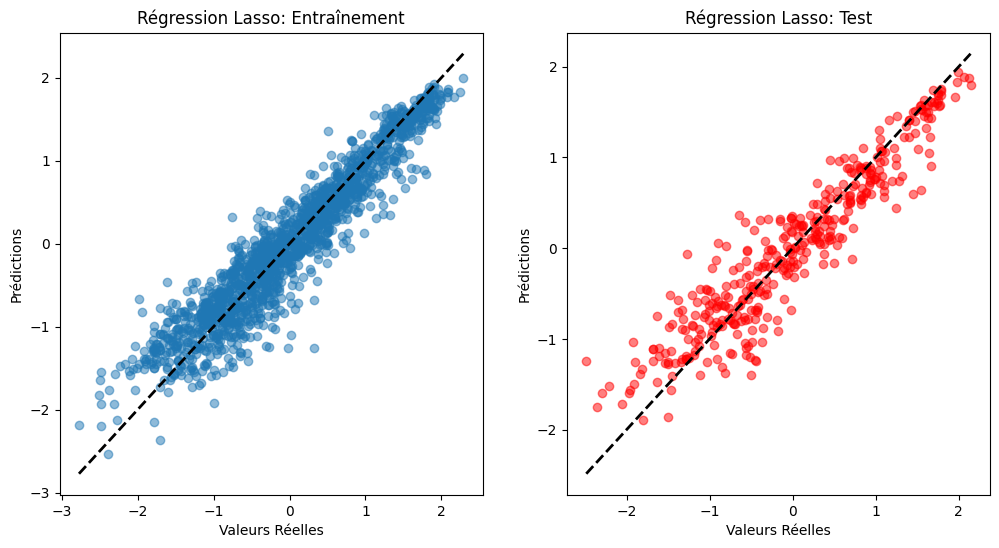

In [ ]:
# Graphique des prédictions vs valeurs réelles pour l'entraînement avec Lasso
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, 1er subplot
plt.scatter(y_train, y_train_pred_lasso, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.title('Régression Lasso: Entraînement')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')

# Graphique des prédictions vs valeurs réelles pour le test avec Lasso
plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, 2e subplot
plt.scatter(y_test, y_test_pred_lasso, alpha=0.5, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Régression Lasso: Test')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')

plt.show()


## Model ElasticNete

In [ ]:
from sklearn.linear_model import ElasticNet
# Création du modèle Elastic Net
# alpha est le paramètre de régularisation total
# l1_ratio est le compromis entre la pénalité Lasso (l1) et Ridge (l2), avec 0.5 étant un équilibre égal
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)

# Entraînement du modèle sur l'ensemble d'entraînement
elastic_net_model.fit(X_train, y_train)

# Prédictions sur l'ensemble d'entraînement
y_train_pred_elastic = elastic_net_model.predict(X_train)

# Prédictions sur l'ensemble de test
y_test_pred_elastic = elastic_net_model.predict(X_test)

# Calcul des performances
mse_train_elastic = mean_squared_error(y_train, y_train_pred_elastic)
r2_train_elastic = r2_score(y_train, y_train_pred_elastic)
mse_test_elastic = mean_squared_error(y_test, y_test_pred_elastic)
r2_test_elastic = r2_score(y_test, y_test_pred_elastic)

print(f"Elastic Net - Ensemble d'entraînement: MSE = {mse_train_elastic:.2f}, R² = {r2_train_elastic:.2f}")
print(f"Elastic Net - Ensemble de test: MSE = {mse_test_elastic:.2f}, R² = {r2_test_elastic:.2f}")


Elastic Net - Ensemble d'entraînement: MSE = 0.19, R² = 0.81
Elastic Net - Ensemble de test: MSE = 0.22, R² = 0.79


In [ ]:
from sklearn.linear_model import ElasticNetCV

# Création et entraînement du modèle ElasticNetCV
elastic_cv_model = ElasticNetCV(l1_ratio=[.1, .5, .7, .9, .95, .99, 1], cv=5)
elastic_cv_model.fit(X_train, y_train)

# Utiliser les meilleurs paramètres trouvés
print("Meilleur alpha trouvé :", elastic_cv_model.alpha_)
print("Meilleur l1_ratio trouvé :", elastic_cv_model.l1_ratio_)

# Prédictions et évaluation
y_train_pred_elastic_cv = elastic_cv_model.predict(X_train)
y_test_pred_elastic_cv = elastic_cv_model.predict(X_test)

print(f"ElasticNetCV - Ensemble d'entraînement: R² = {r2_score(y_train, y_train_pred_elastic_cv):.2f}")
print(f"ElasticNetCV - Ensemble de test: R² = {r2_score(y_test, y_test_pred_elastic_cv):.2f}")


Meilleur alpha trouvé : 0.0029749917072404214
Meilleur l1_ratio trouvé : 1.0
ElasticNetCV - Ensemble d'entraînement: R² = 0.91
ElasticNetCV - Ensemble de test: R² = 0.88


## Model Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Création du modèle Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Entraînement du modèle sur l'ensemble d'entraînement
rf_model.fit(X_train, y_train)

# Prédictions sur l'ensemble d'entraînement
y_train_pred_rf = rf_model.predict(X_train)

# Prédictions sur l'ensemble de test
y_test_pred_rf = rf_model.predict(X_test)

# Calcul des performances
mse_train_rf = mean_squared_error(y_train, y_train_pred_rf)
r2_train_rf = r2_score(y_train, y_train_pred_rf)
mse_test_rf = mean_squared_error(y_test, y_test_pred_rf)
r2_test_rf = r2_score(y_test, y_test_pred_rf)

print(f"Random Forest - Ensemble d'entraînement: MSE = {mse_train_rf:.2f}, R² = {r2_train_rf:.2f}")
print(f"Random Forest - Ensemble de test: MSE = {mse_test_rf:.2f}, R² = {r2_test_rf:.2f}")


Random Forest - Ensemble d'entraînement: MSE = 0.01, R² = 0.99
Random Forest - Ensemble de test: MSE = 0.12, R² = 0.89


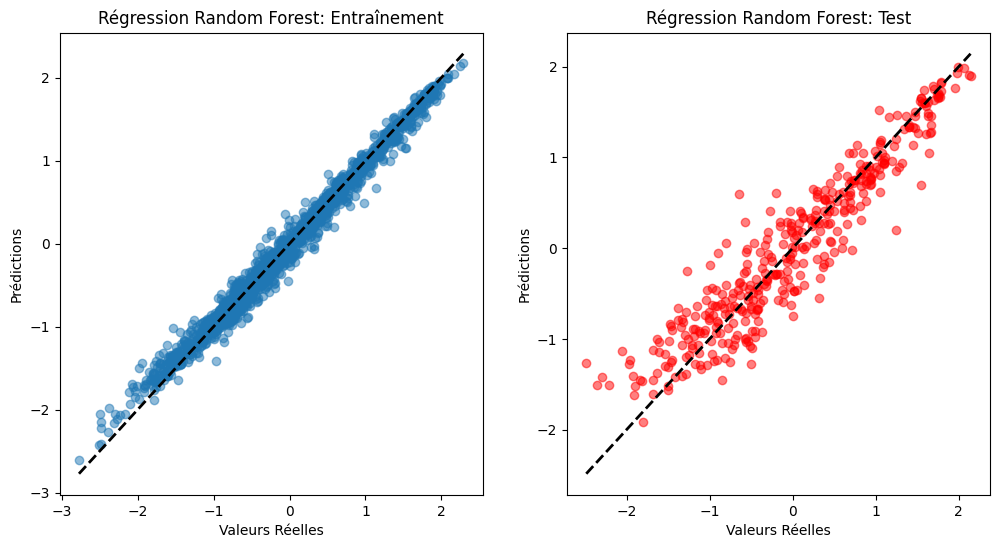

In [ ]:
# Graphique des prédictions vs valeurs réelles pour l'entraînement avec Random Forest
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, 1er subplot
plt.scatter(y_train, y_train_pred_rf, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.title('Régression Random Forest: Entraînement')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')

# Graphique des prédictions vs valeurs réelles pour le test avec Random Forest
plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, 2e subplot
plt.scatter(y_test, y_test_pred_rf, alpha=0.5, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Régression Random Forest: Test')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')

plt.show()


## Model XGBRegressor

In [ ]:
from xgboost import XGBRegressor

# Création du modèle XGBoost
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Entraînement du modèle sur l'ensemble d'entraînement
xgb_model.fit(X_train, y_train)

# Prédictions sur l'ensemble d'entraînement
y_train_pred_xgb = xgb_model.predict(X_train)

# Prédictions sur l'ensemble de test
y_test_pred_xgb = xgb_model.predict(X_test)

# Calcul des performances
mse_train_xgb = mean_squared_error(y_train, y_train_pred_xgb)
r2_train_xgb = r2_score(y_train, y_train_pred_xgb)
mse_test_xgb = mean_squared_error(y_test, y_test_pred_xgb)
r2_test_xgb = r2_score(y_test, y_test_pred_xgb)

print(f"XGBoost - Ensemble d'entraînement: MSE = {mse_train_xgb:.2f}, R² = {r2_train_xgb:.2f}")
print(f"XGBoost - Ensemble de test: MSE = {mse_test_xgb:.2f}, R² = {r2_test_xgb:.2f}")


XGBoost - Ensemble d'entraînement: MSE = 0.03, R² = 0.97
XGBoost - Ensemble de test: MSE = 0.11, R² = 0.89


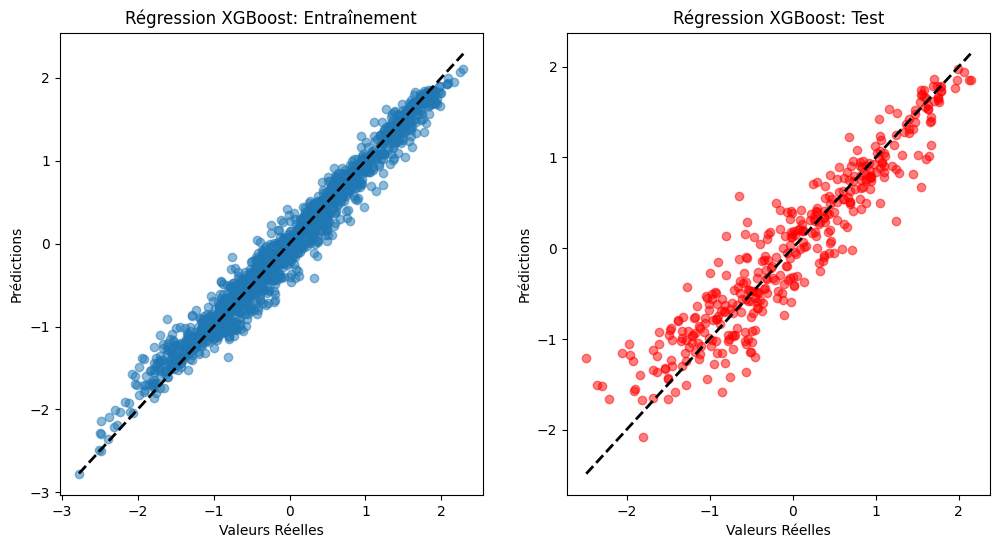

In [ ]:
# Graphique des prédictions vs valeurs réelles pour l'entraînement avec XGBoost
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)  # 1 ligne, 2 colonnes, 1er subplot
plt.scatter(y_train, y_train_pred_xgb, alpha=0.5)
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
plt.title('Régression XGBoost: Entraînement')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')

# Graphique des prédictions vs valeurs réelles pour le test avec XGBoost
plt.subplot(1, 2, 2)  # 1 ligne, 2 colonnes, 2e subplot
plt.scatter(y_test, y_test_pred_xgb, alpha=0.5, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.title('Régression XGBoost: Test')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')

plt.show()


# Importance des Variables

## Exemple avec Random Forest

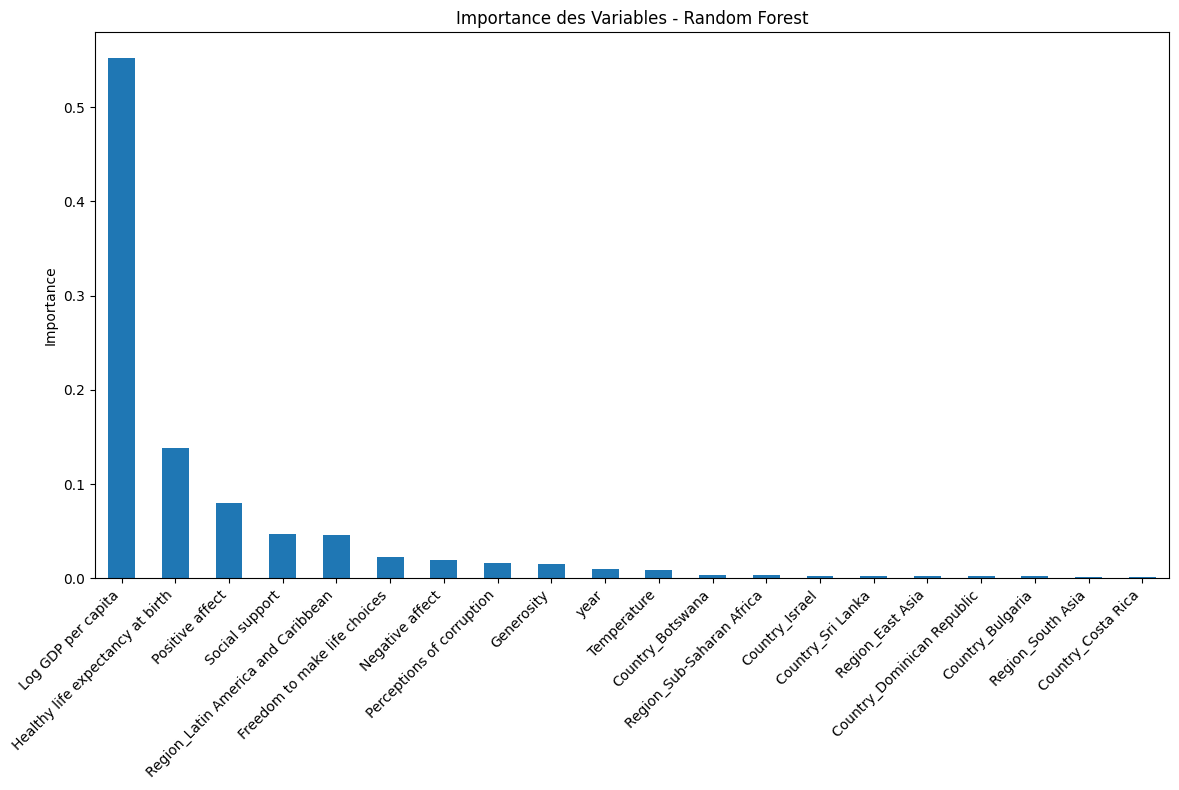

In [ ]:
# Importance des variables pour Random Forest
importances_rf = rf_model.feature_importances_
features_rf = pd.Series(importances_rf, index=X_train.columns).sort_values(ascending=False)

# Limiter le nombre de variables affichées (par exemple, les 20 plus importantes)
top_n = 20
top_features_rf = features_rf.head(top_n)

# Visualisation
plt.figure(figsize=(12, 8))
top_features_rf.plot(kind='bar')
plt.title('Importance des Variables - Random Forest')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Ajuste les espaces pour que tout s'affiche correctement
plt.show()


## Exemple avec XGBoost

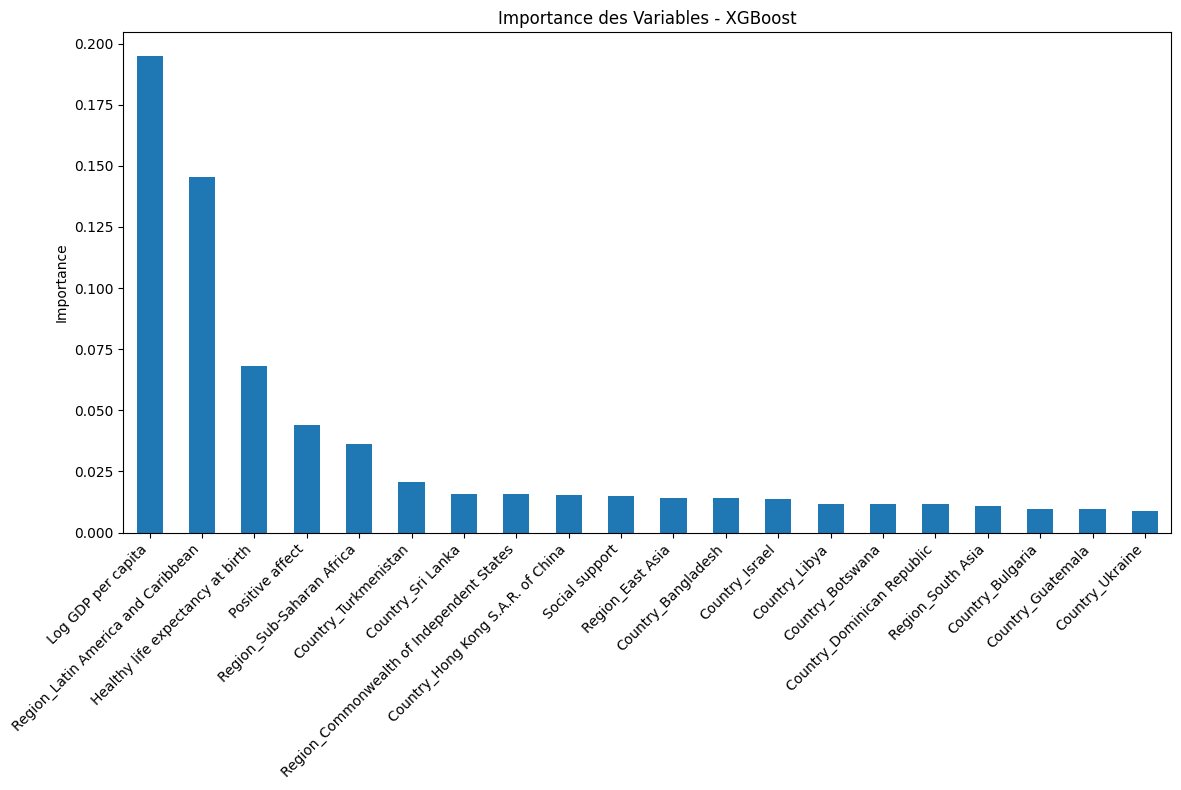

In [ ]:
# Importance des variables pour XGBoost
importances_xgb = xgb_model.feature_importances_
features_xgb = pd.Series(importances_xgb, index=X_train.columns).sort_values(ascending=False)

# Limiter le nombre de variables affichées (par exemple, les 20 plus importantes)
top_n = 20
top_features_xgb = features_xgb.head(top_n)

# Visualisation
plt.figure(figsize=(12, 8))
top_features_xgb.plot(kind='bar')
plt.title('Importance des Variables - XGBoost')
plt.ylabel('Importance')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()  # Ajuste les espaces pour que tout s'affiche correctement
plt.show()


# Sélection de Variables (RFE)
La sélection de variables par RFE (Recursive Feature Elimination) peut aider à identifier les variables les plus importantes pour le modèle.

## Random Forest

In [ ]:
from sklearn.feature_selection import RFE

# RFE pour la sélection de variables
selector_rf = RFE(rf_model, n_features_to_select=10, step=1)  # Sélection de 10 variables par exemple
selector_rf = selector_rf.fit(X_train, y_train)

# Variables sélectionnées
selected_features_rf = X_train.columns[selector_rf.support_]
print("Variables sélectionnées (Random Forest) :", selected_features_rf)


KeyboardInterrupt: 

## XGBoost

In [ ]:
# RFE pour la sélection de variables
selector_xgb = RFE(xgb_model, n_features_to_select=10, step=1)  # Sélection de 10 variables par exemple
selector_xgb = selector_xgb.fit(X_train, y_train)

# Variables sélectionnées
selected_features_xgb = X_train.columns[selector_xgb.support_]
print("Variables sélectionnées (XGBoost) :", selected_features_xgb)


# Analyse des Résidus
L'analyse des résidus peut aider à identifier des motifs systématiques dans les erreurs de prédiction, ce qui peut indiquer des biais ou des domaines d'amélioration potentiels.

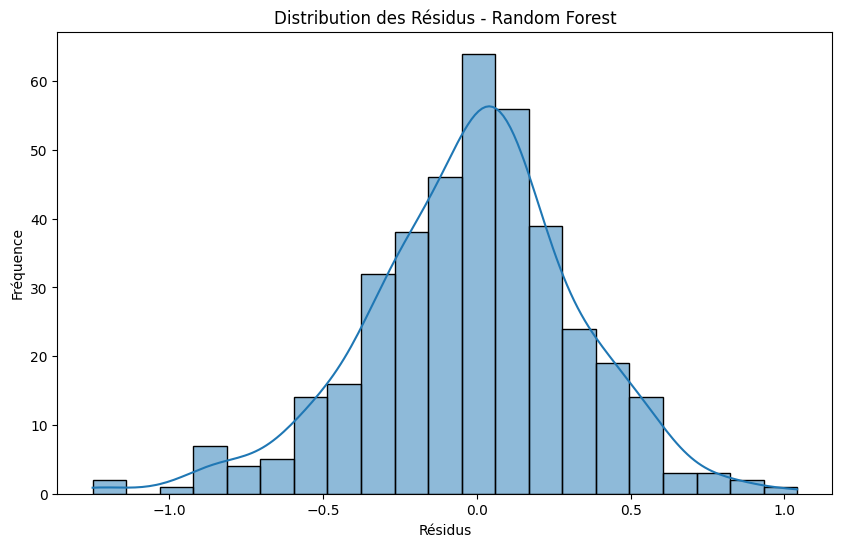

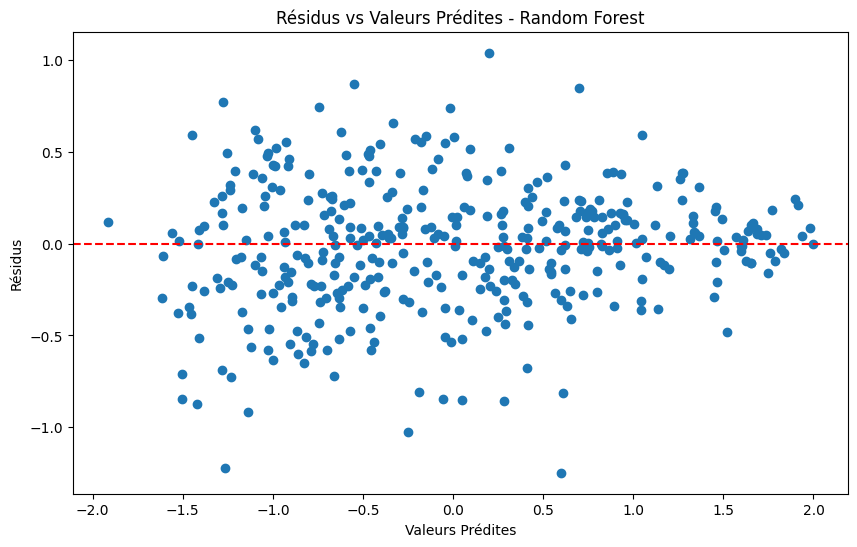

In [ ]:
# Calcul des résidus pour Random Forest
residuals_rf = y_test - y_test_pred_rf

# Visualisation des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residuals_rf, kde=True)
plt.title('Distribution des Résidus - Random Forest')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()

# Diagramme de dispersion des résidus vs valeurs prédites
plt.figure(figsize=(10, 6))
plt.scatter(y_test_pred_rf, residuals_rf)
plt.axhline(0, color='red', linestyle='--')
plt.title('Résidus vs Valeurs Prédites - Random Forest')
plt.xlabel('Valeurs Prédites')
plt.ylabel('Résidus')
plt.show()


In [ ]:
# La distribution des résidus semble être centrée autour de zéro, ce qui est une bonne indication que le modèle n'a pas de biais systématique.
#La forme de la distribution est relativement symétrique,
#ce qui suggère que les erreurs sont distribuées de manière uniforme autour de la valeur prédite.

#La plupart des résidus sont compris entre -1 et 1, ce qui indique que les erreurs de prédiction sont raisonnablement contenues.
#Cependant, il y a quelques résidus plus éloignés, ce qui pourrait indiquer des points aberrants ou des valeurs mal prédictes.


"""Deuxième graphique"""
#Observation : La ligne rouge pointillée représente l'axe où les résidus seraient nuls.
#La majorité des points sont centrés autour de cette ligne, ce qui est un bon signe.

#Cela indique que, en moyenne, les prédictions du modèle sont proches des valeurs réelles, sans biais systématique important.
#Les résidus sont bien répartis autour de zéro.

#ne distribution aléatoire des résidus suggère que le modèle est bien ajusté aux données
#et qu'il n'y a pas de tendance ou de pattern non capturé par le modèle.


'Deuxième graphique'

# Courbes d'Apprentissage
Les courbes d'apprentissage montrent comment la performance du modèle évolue en fonction de la taille de l'ensemble d'entraînement.

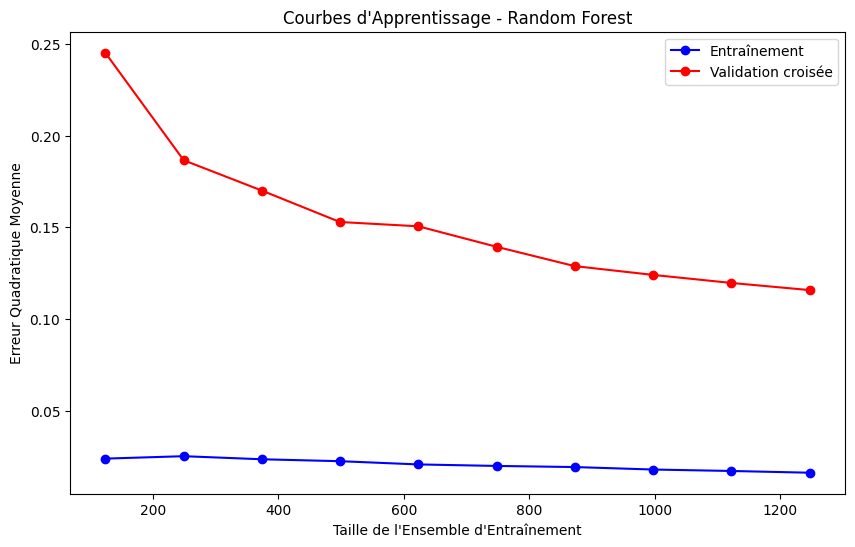

In [ ]:
from sklearn.model_selection import learning_curve

# Calculer les courbes d'apprentissage pour Random Forest
train_sizes, train_scores, test_scores = learning_curve(
    rf_model, X_train, y_train, cv=5, scoring='neg_mean_squared_error',
    train_sizes=np.linspace(0.1, 1.0, 10), n_jobs=-1)

# Moyenne et écart-type des scores
train_scores_mean = -np.mean(train_scores, axis=1)
test_scores_mean = -np.mean(test_scores, axis=1)

# Visualisation des courbes d'apprentissage
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color='blue', label='Entraînement')
plt.plot(train_sizes, test_scores_mean, 'o-', color='red', label='Validation croisée')
plt.title('Courbes d\'Apprentissage - Random Forest')
plt.xlabel('Taille de l\'Ensemble d\'Entraînement')
plt.ylabel('Erreur Quadratique Moyenne')
plt.legend(loc='best')
plt.show()


In [ ]:
# Courbe d'Entraînement (bleue) :
#La courbe d'entraînement montre une erreur très faible, ce qui suggère que le modèle s'ajuste très bien aux données d'entraînement.

#Courbe de Validation Croisée (rouge) :
#La courbe de validation croisée montre une erreur plus élevée que celle de l'entraînement,
#mais elle diminue progressivement à mesure que la taille de l'ensemble d'entraînement augmente.

# Cross-validation et Validation Croisée Stratifiée
Utiliser la validation croisée pour évaluer les modèles de manière plus robuste et obtenir des estimations plus fiables des performances.

In [ ]:
from sklearn.model_selection import cross_val_score

# Validation croisée pour Random Forest
cv_scores_rf = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='r2')
print("Scores de validation croisée (Random Forest) :", cv_scores_rf)
print("Score moyen de validation croisée :", np.mean(cv_scores_rf))


KeyboardInterrupt: 

# Comparaison des Modèles

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Définition des modèles
lr_model = LinearRegression()
ridge_model = Ridge(alpha=1.0)
lasso_model = Lasso(alpha=0.01)
elastic_net_model = ElasticNet(alpha=0.1, l1_ratio=0.5)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Entraînement des modèles
lr_model.fit(X_train, y_train)
ridge_model.fit(X_train, y_train)
lasso_model.fit(X_train, y_train)
elastic_net_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)

# Prédictions et évaluation des modèles
models = {
    'Linear Regression': lr_model,
    'Ridge Regression': ridge_model,
    'Lasso Regression': lasso_model,
    'Elastic Net': elastic_net_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model
}

results_train = {}
results_test = {}
for name, model in models.items():
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calcul des erreurs pour l'ensemble d'entraînement
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)

    # Calcul des erreurs pour l'ensemble de test
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    # Stockage des résultats dans les dictionnaires
    results_train[name] = {'MSE': mse_train, 'RMSE': rmse_train, 'R²': r2_train, 'MAE': mae_train}
    results_test[name] = {'MSE': mse_test, 'RMSE': rmse_test, 'R²': r2_test, 'MAE': mae_test}

# Conversion des résultats en DataFrame
results_train_df = pd.DataFrame(results_train).T
results_test_df = pd.DataFrame(results_test).T

# Affichage des résultats
print("Résultats sur l'ensemble d'entraînement :")
print(results_train_df)

print("\nRésultats sur l'ensemble de test :")
print(results_test_df)


Résultats sur l'ensemble d'entraînement :
                        MSE      RMSE        R²       MAE
Linear Regression  0.086946  0.294866  0.912662  0.221148
Ridge Regression   0.086472  0.294060  0.913139  0.219922
Lasso Regression   0.100678  0.317297  0.898869  0.244213
Elastic Net        0.193791  0.440217  0.805337  0.351280
Random Forest      0.014891  0.122028  0.985042  0.090819
XGBoost            0.029544  0.171883  0.970323  0.129382

Résultats sur l'ensemble de test :
                            MSE          RMSE            R²           MAE
Linear Regression  8.697244e+24  2.949109e+12 -8.545131e+24  1.493339e+11
Ridge Regression   1.197423e-01  3.460380e-01  8.823520e-01  2.529757e-01
Lasso Regression   1.256470e-01  3.544672e-01  8.765506e-01  2.700199e-01
Elastic Net        2.165227e-01  4.653200e-01  7.872642e-01  3.793375e-01
Random Forest      1.165036e-01  3.413262e-01  8.855340e-01  2.591742e-01
XGBoost            1.147392e-01  3.387317e-01  8.872676e-01  2.581467e-0

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import xgboost as xgb


# Sélectionner uniquement les colonnes numériques
numeric_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Calculer les bornes IQR pour chaque colonne numérique
Q1 = df[numeric_columns].quantile(0.25)
Q3 = df[numeric_columns].quantile(0.75)
IQR = Q3 - Q1

borne_inferieure = Q1 - 1.5 * IQR
borne_superieure = Q3 + 1.5 * IQR

# Remplacer les outliers en dessous de la borne inférieure par la borne inférieure, et ceux au-dessus par la borne supérieure
df_imputed = df.copy()  # Créer une copie pour conserver l'original
for column in numeric_columns:
    df_imputed[column] = df_imputed[column].apply(
        lambda x: borne_inferieure[column] if x < borne_inferieure[column]
        else (borne_superieure[column] if x > borne_superieure[column]
              else x)
    )

# Séparer les features et la cible
X = df.drop(columns=['Life Ladder'])  # remplacer 'Life Ladder' par votre variable cible
y = df['Life Ladder']

X_imputed = df_imputed.drop(columns=['Life Ladder'])
y_imputed = df_imputed['Life Ladder']

# Séparer les données en ensemble d'entraînement et de test pour les deux ensembles
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train_imp, X_test_imp, y_train_imp, y_test_imp = train_test_split(X_imputed, y_imputed, test_size=0.2, random_state=42)

# Définir les modèles à tester
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'Elastic Net': ElasticNet(),
    'XGBoost': xgb.XGBRegressor()
}

# Fonction pour évaluer les modèles
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    predictions = model.predict(X_test)
    mse = mean_squared_error(y_test, predictions)
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    return {'MSE': mse, 'R2': r2, 'MAE': mae}

# Comparaison des modèles avec et sans outliers
results_with_outliers = {}
results_without_outliers = {}

for name, model in models.items():
    # Évaluation avec les outliers
    results_with_outliers[name] = evaluate_model(model, X_train, X_test, y_train, y_test)

    # Évaluation sans les outliers (après imputation)
    results_without_outliers[name] = evaluate_model(model, X_train_imp, X_test_imp, y_train_imp, y_test_imp)

# Affichage des résultats
print("Résultats avec outliers :")
for name, metrics in results_with_outliers.items():
    print(f"{name} - MSE: {metrics['MSE']}, R2: {metrics['R2']}, MAE: {metrics['MAE']}")

print("\nRésultats sans outliers (après imputation) :")
for name, metrics in results_without_outliers.items():
    print(f"{name} - MSE: {metrics['MSE']}, R2: {metrics['R2']}, MAE: {metrics['MAE']}")


Résultats avec outliers :
Linear Regression - MSE: 8.697244222796863e+24, R2: -8.545130609039078e+24, MAE: 149333941930.072
Random Forest - MSE: 0.1164671113068967, R2: 0.8855698825650685, MAE: 0.25821358579099035
Ridge - MSE: 0.11974227604181102, R2: 0.8823520000141102, MAE: 0.25297566116285375
Lasso - MSE: 1.0179384923785864, R2: -0.0001348871569470944, MAE: 0.8433457060371458
Elastic Net - MSE: 0.6934630475548832, R2: 0.31866552644727797, MAE: 0.6871267938374338
XGBoost - MSE: 0.11728580703227964, R2: 0.8847655057161211, MAE: 0.2629028079387542

Résultats sans outliers (après imputation) :
Linear Regression - MSE: 0.24586427273198375, R2: 0.7584358598227814, MAE: 0.38631280260339457
Random Forest - MSE: 0.1532747953665619, R2: 0.8494059598731357, MAE: 0.3014159591074455
Ridge - MSE: 0.2458975460540281, R2: 0.7584031684465957, MAE: 0.3863567665019301
Lasso - MSE: 1.0179384923785864, R2: -0.0001348871569470944, MAE: 0.8433457060371458
Elastic Net - MSE: 0.7013697783601324, R2: 0.31089

Exemple d'Utilisation de SHAP avec Random Forest

In [ ]:
pip install shap

In [ ]:

import shap

# Calcul des valeurs de SHAP pour Random Forest
explainer_rf = shap.TreeExplainer(rf_model)
shap_values_rf = explainer_rf.shap_values(X_test)

# Visualisation des valeurs de SHAP
shap.summary_plot(shap_values_rf, X_test)


Exemple d'Utilisation de SHAP avec XGBoost

In [ ]:
# Calcul des valeurs de SHAP pour XGBoost
explainer_xgb = shap.TreeExplainer(xgb_model)
shap_values_xgb = explainer_xgb.shap_values(X_test)

# Visualisation des valeurs de SHAP
shap.summary_plot(shap_values_xgb, X_test)


Définir une Fonction pour Évaluer les Performances du Modèle

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calcul des erreurs pour l'ensemble d'entraînement
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)

    # Calcul des erreurs pour l'ensemble de test
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)

    return mse_train, rmse_train, r2_train, mae_train, mse_test, rmse_test, r2_test, mae_test

Évaluer le Modèle avec et sans Chaque Variable

In [ ]:


# Liste des variables à tester
variables = X_train.columns

# Initialiser les modèles
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Dictionnaires pour stocker les résultats
results_rf = {}
results_xgb = {}

# Évaluer les performances avec toutes les variables
results_rf['All'] = evaluate_model(rf_model, X_train, y_train, X_test, y_test)
results_xgb['All'] = evaluate_model(xgb_model, X_train, y_train, X_test, y_test)

# Évaluer les performances en supprimant une variable à la fois
for var in variables:
    X_train_dropped = X_train.drop(columns=[var])
    X_test_dropped = X_test.drop(columns=[var])

    results_rf[var] = evaluate_model(rf_model, X_train_dropped, y_train, X_test_dropped, y_test)
    results_xgb[var] = evaluate_model(xgb_model, X_train_dropped, y_train, X_test_dropped, y_test)

# Convertir les résultats en DataFrame pour une meilleure visualisation
columns = ['MSE_train', 'RMSE_train', 'R2_train', 'MSE_test', 'RMSE_test', 'R2_test']
results_rf_df = pd.DataFrame(results_rf, index=columns).T
results_xgb_df = pd.DataFrame(results_xgb, index=columns).T

print("Résultats de Random Forest :")
print(results_rf_df)

print("\nRésultats de XGBoost :")
print(results_xgb_df)


Étude d'Ablation pour "Log GDP per capita"

1. Définir une Fonction pour Évaluer les Performances du Modèle

In [ ]:
def evaluate_model(model, X_train, y_train, X_test, y_test):
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Calcul des métriques pour l'ensemble d'entraînement
    mse_train = mean_squared_error(y_train, y_train_pred)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_train_pred)
    mae_train = mean_absolute_error(y_train, y_train_pred)  # Ajout de la MAE pour l'ensemble d'entraînement

    # Calcul des métriques pour l'ensemble de test
    mse_test = mean_squared_error(y_test, y_test_pred)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_test_pred)
    mae_test = mean_absolute_error(y_test, y_test_pred)  # Ajout de la MAE pour l'ensemble de test

    # Retourner toutes les métriques, y compris la MAE
    return mse_train, rmse_train, r2_train, mae_train, mse_test, rmse_test, r2_test, mae_test

2. Comparer les Performances avec et sans "Log GDP per capita"

In [ ]:
# Initialiser les modèles
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
xgb_model = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Évaluer les performances avec toutes les variables
results_rf = evaluate_model(rf_model, X_train, y_train, X_test, y_test)
results_xgb = evaluate_model(xgb_model, X_train, y_train, X_test, y_test)

# Évaluer les performances en supprimant "Log GDP per capita"
X_train_dropped = X_train.drop(columns=["Log GDP per capita"])
X_test_dropped = X_test.drop(columns=["Log GDP per capita"])

results_rf_dropped = evaluate_model(rf_model, X_train_dropped, y_train, X_test_dropped, y_test)
results_xgb_dropped = evaluate_model(xgb_model, X_train_dropped, y_train, X_test_dropped, y_test)

# Afficher les résultats
columns = ['MSE_train', 'RMSE_train', 'R2_train', 'MAE_train', 'MSE_test', 'RMSE_test', 'R2_test', 'MAE_test']
results_df = pd.DataFrame({
    'Random Forest (avec Log GDP per capita)': results_rf,
    'Random Forest (sans Log GDP per capita)': results_rf_dropped,
    'XGBoost (avec Log GDP per capita)': results_xgb,
    'XGBoost (sans Log GDP per capita)': results_xgb_dropped
}, index=columns)

print("Résultats de l'étude d'ablation pour Log GDP per capita :")
print(results_df)
